In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special as sp
from matplotlib import rc

In [8]:
# define the inertia factors A1, A2, A3
def inertiaFactor(mois):
    a1=1.0/(2.0*mois[0])
    a2=1.0/(2.0*mois[1])
    a3=1.0/(2.0*mois[2])
    factors=(a1,a2,a3)
    return factors
# define the components of the angular momenta $j$ for the odd-particle
def jComponent(oddSpin,theta):
    thetaDegrees=theta*np.pi/180.0
    j1=oddSpin*np.cos(thetaDegrees)
    j2=oddSpin*np.sin(thetaDegrees)
    jcomp=(j1,j2)
    return jcomp
#define the inertial function
def aFct(spin,oddSpin,theta,mois):
    j2=jComponent(oddSpin,theta)[1]
    a1=inertiaFactor(mois)[0]
    a2=inertiaFactor(mois)[1]
    term=a2*(1.0-j2/spin)-a1
    return term
#define the variabile u
def u(spin,oddSpin,theta,mois):
    a3=inertiaFactor(mois)[2]
    a1=inertiaFactor(mois)[0]
    a=aFct(spin,oddSpin,theta,mois)
    term=(a3-a1)/a
    return term

#define the variabile v0
def vZero(spin,oddSpin,theta,mois):
    a1=inertiaFactor(mois)[0]
    j1-Jcomponent(oddSpin,theta)[0]
    a=aFct(spin,oddSpin,theta,mois)
    term=a1*j1/a
    return (-1.0)*term

#define the variable k
def k(spin,oddSpin,theta, mois):
    return np.sqrt(u(spin,oddSpin,theta,mois))

#define the wobbling frequency
def omega(spin,oddSpin,theta,mois):
    j1=jComponent(oddSpin,theta)[0]
    j2=jComponent(oddSpin,theta)[1]
    a1=inertiaFactor(mois)[0]
    a2=inertiaFactor(mois)[1]
    a3=inertiaFactor(mois)[2]
    term1=(2.0*spin+1.0)*(a2-a1-(a2*j2)/spin)-2*a1*j1
    term2=(2.0*spin+1.0)*(a3-a1)-2.0*a1*j1
    term3=(a3-a1)*(a2-a1-a2*j2/spin)
    result=np.sqrt(term1*term2-term3)
    return result

def omegaPrime(spin,oddSpin,theta,mois):
    j1=jComponent(oddSpin,theta)[0]
    j2=jComponent(oddSpin,theta)[1]
    a1=inertiaFactor(mois)[0]
    a2=inertiaFactor(mois)[1]
    a3=inertiaFactor(mois)[2]
    term1=(2.0*spin+1.0)*(a2-a1-(a2*j2)/spin)+2*a1*j1
    term2=(2.0*spin+1.0)*(a3-a1)+2.0*a1*j1
    term3=(a3-a1)*(a2-a1-a2*j2/spin)
    result=np.sqrt(term1*term2-term3)
    return result

def omegaBar(spin,oddSpin,theta,mois):
    a=aFct(spin,oddSpin,theta,mois)
    omg=omega(spin,oddSpin,theta,mois)
    return omg/a

## Testing the $\bar{\omega}_I$ term and the $k_I$ term

In [9]:
paramSet=(11/2,-160,129,3,52)
spins=np.arange(5.0,35.1,0.1)
omegas=[]
ombars=[]
for i in spins:
    mois=(paramSet[2],paramSet[3],paramSet[4])
    currentomega=omega(i,paramSet[0],paramSet[1],mois)
    currentomegabar=omegaBar(i,paramSet[0],paramSet[1],mois)
    omegas.append(currentomega)
    ombars.append(currentomegabar)

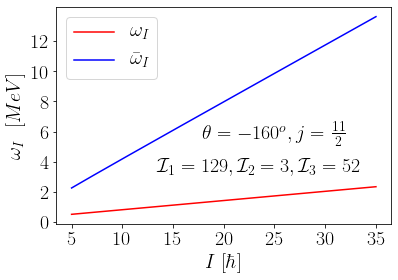

In [10]:
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig, ax=plt.subplots()
ax.plot(spins,omegas,'r-',label='$\omega_I$')
ax.plot(spins,ombars,'b-',label='$\\bar{\omega}_I$')
ax.set_xticks([5,10,15,20,25,30,35])
ax.set_yticks([0,2,4,6,8,10,12])
plt.legend(loc='best',prop={'size': 20})
plt.xlabel('$I\ [\hbar]$')
plt.ylabel('$\omega_I\ \  [MeV]$')
ax.text(0.6, 0.25, '$\mathcal{I}_1=129,\mathcal{I}_2=3,\mathcal{I}_3=52$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
ax.text(0.65, 0.4, '$\\theta=-160^o,j={11 \over 2}$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
plt.savefig("ombars.pdf",bbox_inches='tight')
plt.show()

# Graphical representation for the term $k_I$

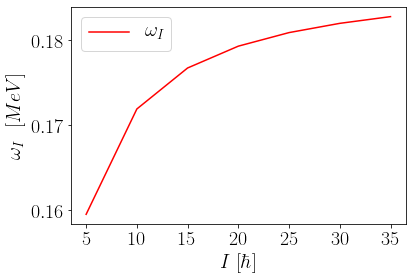

In [11]:
spins=[]
ks=[]
for i in np.arange(5,40,5):
    spins.append(i)
    mois=(paramSet[2],paramSet[3],paramSet[4])
    ks.append(k(i,paramSet[0],paramSet[1],mois))
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig, ax=plt.subplots()
ax.plot(spins,ks,'r-',label='$\omega_I$')
ax.set_xticks([5,10,15,20,25,30,35])
# ax.set_yticks([0,2,4,6,8,10,12])
plt.legend(loc='best',prop={'size': 20})
plt.xlabel('$I\ [\hbar]$')
plt.ylabel('$\omega_I\ \  [MeV]$')
# ax.text(0.6, 0.25, '$\mathcal{I}_1=129,\mathcal{I}_2=3,\mathcal{I}_3=52$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
# ax.text(0.65, 0.4, '$\\theta=-160^o,j={11 \over 2}$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
plt.savefig("kaii.pdf",bbox_inches='tight')
plt.show()